# Introduction
### Importance of Sleep
In today's fast-paced world, sleep often becomes a neglected aspect of our daily routines, yet its importance is profound in maintaining overall well-being and health. Sleep is not merely a time to rest but a critical biological function that restores and rejuvenates the mind and body. Studies have linked adequate sleep to improved memory, mood stability, and physical health, including the regulation of metabolism and reduction of chronic diseases such as diabetes and heart disease. On the other hand, sleep deprivation can lead to a multitude of health problems, impacting mental clarity, emotional stability, and even increasing the risk of chronic conditions. Understanding the role of sleep becomes a necessity, not a luxury, in our pursuit of a healthy and productive life.
### Why do we sleep?
Sleep is a complex biological process characterized by altered consciousness, reduced interaction with surroundings, and periodic cycles involving different stages. It plays a vital role in many bodily functions, including the healing and repair of the heart and blood vessels, balancing hormones, and supporting cognitive functions. Different people require varying amounts of sleep, influenced by age, lifestyle, and health conditions. Evaluating the quality and quantity of sleep is essential in assessing an individual's overall health profile.
### Purpose
The intention of this project is to explore the multifaceted factors that affect sleep and identify what elements are most influential in determining sleep quality and quantity. Various aspects such as lifestyle choices, environmental factors, medical conditions, and psychological stressors will be examined to unravel their impact on sleep patterns. Data science, with its ability to process complex data and highlight underlying trends, becomes an indispensable tool in this exploration. By harnessing data science methodologies, this study aims to shed light on the crucial factors affecting sleep and provide insights that can lead to better sleep practices and, consequently, a healthier population. By understanding these key factors, we can tailor interventions, policies, and personal routines to foster a society that recognizes and prioritizes sleep as a fundamental component of health and well-being. Whether it's adopting better sleep hygiene or addressing specific medical conditions that interfere with sleep, the insights from this study could have far-reaching implications for individuals and communities alike.

In conclusion, as sleep is intertwined with virtually every aspect of our health, this project embarks on a crucial journey to understand the dynamics of sleep and its determinants. The insights drawn from this exploration will not only enrich our understanding but will guide interventions and policies aimed at improving the quality of life through enhanced sleep practices.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# First Dataset

In [2]:
file_path = 'Sleep_health_and_lifestyle_dataset.csv'
sleep_health_and_lifestyle_df = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
sleep_health_and_lifestyle_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


We see different features such as gender, age, occupation, and so on. These feautures can be isolated and split into different groupings of (1) participant identity, (2) sleep statistics, (3) physical activity, and (4) health conditions. To start, let us extract all the information of the participants and understand better who they are.

### Understanding the Different Groupings of Features
#### Participant Identity

In [3]:
num_people = len(sleep_health_and_lifestyle_df)

min_age = sleep_health_and_lifestyle_df['Age'].min()
max_age = sleep_health_and_lifestyle_df['Age'].max()

occupations = sleep_health_and_lifestyle_df['Occupation'].unique()

print(f"Number of participants: {num_people}")
print(f"Range of ages: {min_age} - {max_age}")
print("Different occupations:", ', '.join(occupations))

Number of participants: 374
Range of ages: 27 - 59
Different occupations: Software Engineer, Doctor, Sales Representative, Teacher, Nurse, Engineer, Accountant, Scientist, Lawyer, Salesperson, Manager


With this information there are a couple of generalizations we can make. We know that, for the most part, all of these participants work white-collared jobs. The age range of participants are people who are in or near to the 'middle' of their life. There are only 374 participants, so the sample size in comparison to rest of the world is quite small. There is also a lack of information in where there participants hail from. 

Let us dive a little deeper into the age and occupation range and get a better understanding of the split.

First we need to tidy the data to make it more suitable for exploratory analysis

# Tidy Data

In [4]:
# Replace all of the labels that have 'None' in the disorder column to 'No Disorder' indicating that the dataset does not have missing data.
# sleep_health_and_lifestyle_df['Sleep Disorder'] = sleep_health_and_lifestyle_df['Sleep Disorder'].fillna('No Disorder')

# One-hot encoding for Occupation and BMI Category columns
sleep_health_and_lifestyle_df_tidy = pd.get_dummies(sleep_health_and_lifestyle_df, columns=['Occupation', 'BMI Category'], drop_first=True)

# Manually encoding Gender and Sleep Disorder columns
sleep_health_and_lifestyle_df_tidy['Gender'] = sleep_health_and_lifestyle_df['Gender'].map({'Male': 1, 'Female': 0})
sleep_health_and_lifestyle_df_tidy['Sleep Disorder'] = sleep_health_and_lifestyle_df['Sleep Disorder'].map(lambda x: 0 if x == 'None' or x == np.NAN else 1)

# Splitting Blood Pressure into Systolic and Diastolic
split_values = sleep_health_and_lifestyle_df['Blood Pressure'].str.split('/', expand=True)
sleep_health_and_lifestyle_df_tidy['Systolic BP'], sleep_health_and_lifestyle_df_tidy['Diastolic BP'] = split_values[0], split_values[1]
sleep_health_and_lifestyle_df_tidy['Systolic BP'] = sleep_health_and_lifestyle_df_tidy['Systolic BP'].astype(int)
sleep_health_and_lifestyle_df_tidy['Diastolic BP'] = sleep_health_and_lifestyle_df_tidy['Diastolic BP'].astype(int)

# Dropping the original Blood Pressure column
sleep_health_and_lifestyle_df_tidy.drop(columns=['Blood Pressure'], inplace=True)

# Displaying the first few rows of the processed dataset
sleep_health_and_lifestyle_df_tidy.head()


,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,...,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Systolic BP,Diastolic BP
0,1,1,27,6.1,6,42,6,77,4200,0,...,0,0,0,1,0,0,0,1,126,83
1,2,1,28,6.2,6,60,8,75,10000,0,...,0,0,0,0,0,0,0,0,125,80
2,3,1,28,6.2,6,60,8,75,10000,0,...,0,0,0,0,0,0,0,0,125,80
3,4,1,28,5.9,4,30,8,85,3000,1,...,1,0,0,0,0,0,1,0,140,90
4,5,1,28,5.9,4,30,8,85,3000,1,...,1,0,0,0,0,0,1,0,140,90


# Exploratory Analysis

COMMENTARY

In [5]:
descriptive_statistics = sleep_health_and_lifestyle_df_tidy.describe()
descriptive_statistics

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,...,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Systolic BP,Diastolic BP
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,...,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,0.505348,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,0.414439,...,0.005348,0.085561,0.010695,0.010695,0.106952,0.056150,0.026738,0.395722,128.553476,84.649733
std,108.108742,0.500641,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,0.493285,...,0.073029,0.280090,0.103001,0.103001,0.309466,0.230519,0.161533,0.489660,7.748118,6.161611
min,1.000000,0.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,115.000000,75.000000
25%,94.250000,0.000000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000,80.000000
50%,187.500000,1.000000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130.000000,85.000000
75%,280.750000,1.000000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,135.000000,90.000000
max,374.000000,1.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,142.000000,95.000000


Looking at these statistics, here are some observations we notice:
 - Age: The age of individuals ranges from 27 to 59, with a mean of 42.
 - Sleep Duration: Sleep duration varies from 5.8 to 8.5 hours, with a mean of 7.13 hours.
 - Quality of Sleep: Quality of sleep is rated on a scale, with a mean value of 7.31.
 - Physical Activity Level: This feature has a mean value of 59.17, with a minimum of 30 and a maximum of 90.
 - Stress Level: Stress level ranges from 3 to 8, with a mean value of 5.39.
 - Heart Rate: The mean heart rate is around 70 beats per minute.
 - Daily Steps: The daily steps range from 3000 to 10000, with a mean of 6816.
 - Blood Pressure: Systolic blood pressure ranges from 115 to 142, and diastolic ranges from 75 to 95.

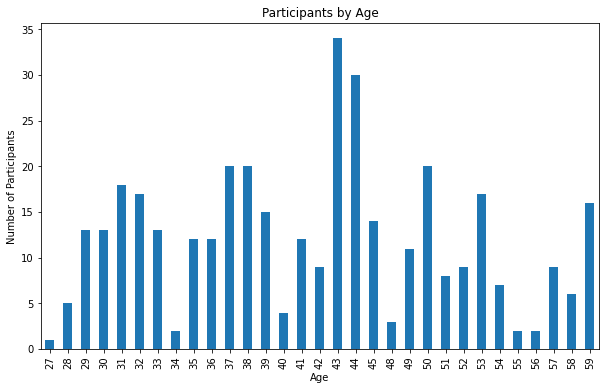

In [6]:

age_counts = sleep_health_and_lifestyle_df_tidy['Age'].value_counts()
age_counts.sort_index(inplace=True)

plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar')
plt.title('Participants by Age')
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.show()

From the age distribution, we see a good spread of participants with a high number in the 43-44 range. There is an interesting correlation between age and number of participants though in almost wave like pattern. These waves go through a 7-8 year cycle. However, we do not see any participants in their early life or older life.


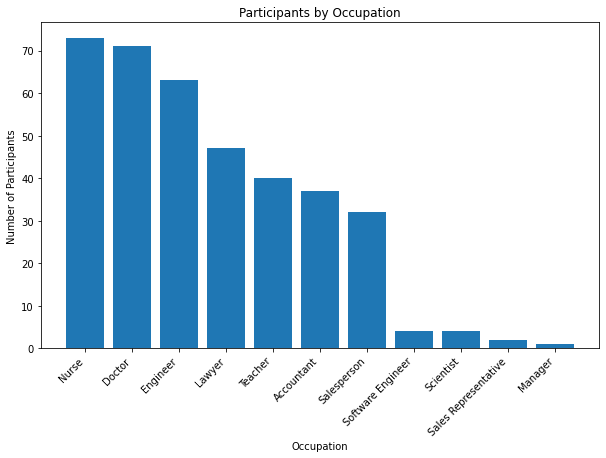

In [7]:
occupation_counts = sleep_health_and_lifestyle_df['Occupation'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(occupation_counts.index, occupation_counts.values)
plt.title('Participants by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45, ha='right')
plt.show()

In the occupation distribution we see a low variation in the occupations. The majority of participants are nurses, doctors, and engineers. Then we see a good chunk represent lawyers, teachers, accountants, and salespeople. Finally, we see a very small number of software engineers, scientists, sales representatives, and managers. 

Now that we have a better understanding of the participants, let us learn more about their sleep statistics.

#### Sleep Statistics

Here we see two main features provided for their sleep, duration and quality. Let us plot both of these to visualize the split up of data.

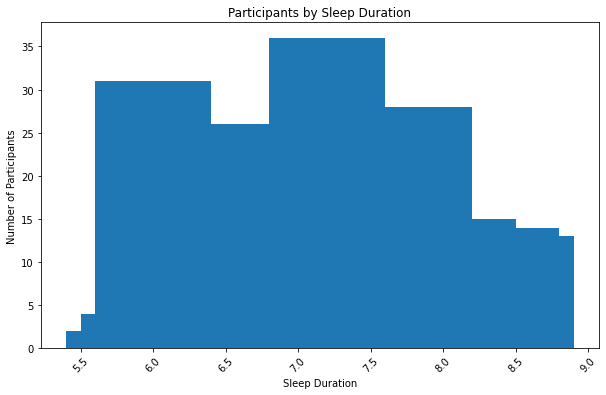

In [8]:
sleep_duration_counts = sleep_health_and_lifestyle_df_tidy['Sleep Duration'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(sleep_duration_counts.index, sleep_duration_counts.values)
plt.xlabel('Sleep Duration')
plt.ylabel('Number of Participants')
plt.title('Participants by Sleep Duration')
plt.xticks(rotation=45)
plt.show()

This bar graph is a bit clogged, but now we see the range of sleep duration. Let us split these up in bigger categories of [5.5, 6), [6 - 6.5), and so on.

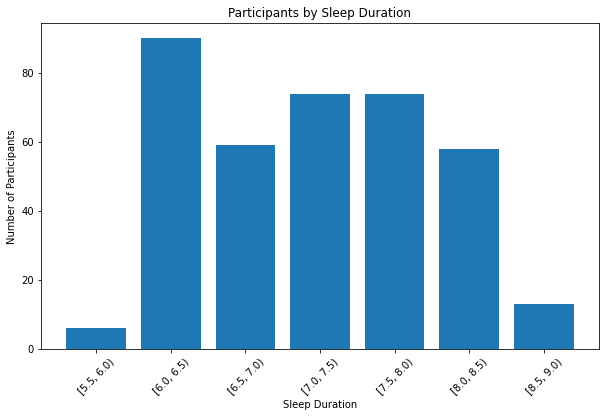

In [9]:
sleep_duration_bins = [5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9]

sleep_duration_counts = pd.cut(sleep_health_and_lifestyle_df['Sleep Duration'], bins=sleep_duration_bins, right=False).value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(sleep_duration_counts.index.astype(str), sleep_duration_counts.values)
plt.xlabel('Sleep Duration')
plt.ylabel('Number of Participants')
plt.title('Participants by Sleep Duration')
plt.xticks(rotation=45)
plt.show()

Here we see the majority of people receiving between 6 to 8.4 hours of sleep, and the outliers in the 5.5 - 5.9 and 8.5 - 9.4 range. Given the common saying is get "6 to 8 hours of sleep", this shows that people in this dataset are hitting that mark. Later on, let's see if this correlates to better health conditions. For now, let us visualize the quality of sleep.

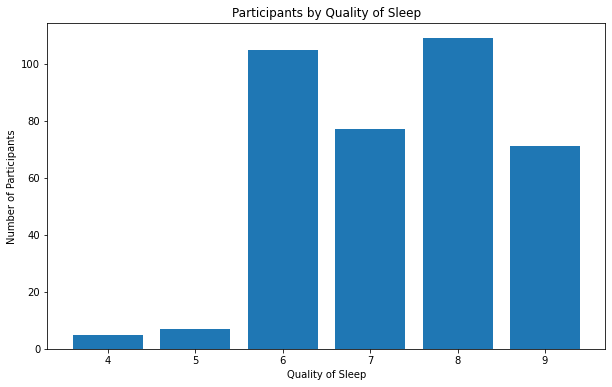

In [10]:
quality_of_sleep_counts = sleep_health_and_lifestyle_df['Quality of Sleep'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(quality_of_sleep_counts.index, quality_of_sleep_counts.values)
plt.xlabel('Quality of Sleep')
plt.ylabel('Number of Participants')
plt.title('Participants by Quality of Sleep')
plt.show()

Based on this bar graph, it seems that a small part of the participants receive below average (4, 5) sleep, while the majority exist in the decent (6, 7) and good (8, 9) sleep. Interesting to note that no one said a number below 4 or above 9, a.k.a. 10.

Let's plot some different features against sleep duration to get a visual idea of which what correlations might exist.

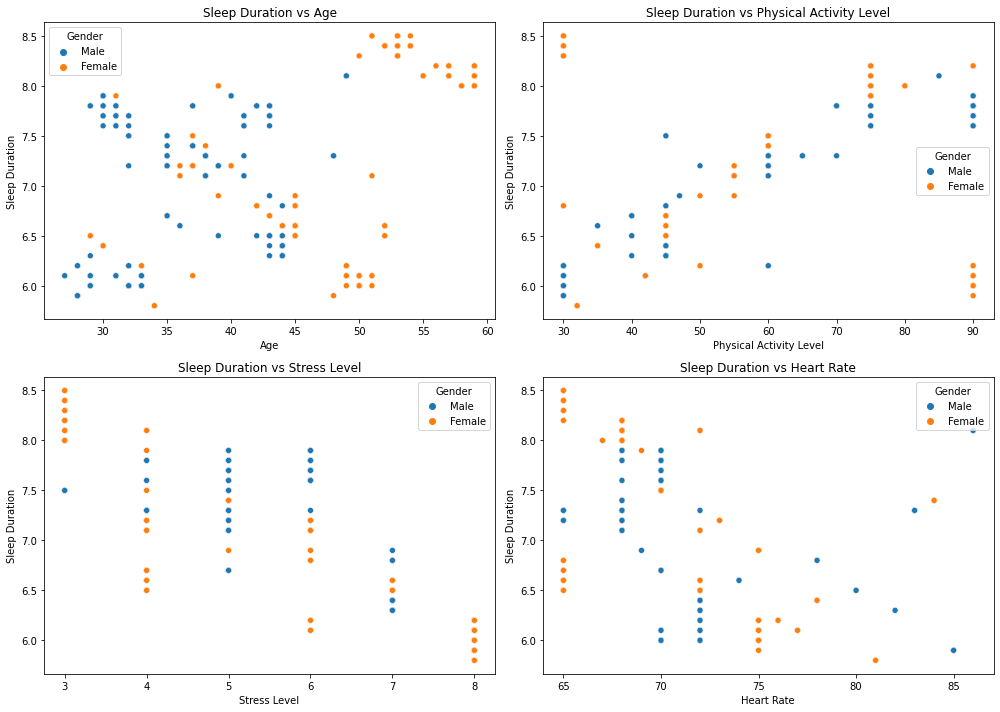

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Relationship between Sleep Duration and Age
sns.scatterplot(x='Age', y='Sleep Duration', hue='Gender', data=sleep_health_and_lifestyle_df, ax=axes[0, 0])
axes[0, 0].set_title('Sleep Duration vs Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Sleep Duration')

# Relationship between Sleep Duration and Physical Activity Level
sns.scatterplot(x='Physical Activity Level', y='Sleep Duration', hue='Gender', data=sleep_health_and_lifestyle_df, ax=axes[0, 1])
axes[0, 1].set_title('Sleep Duration vs Physical Activity Level')
axes[0, 1].set_xlabel('Physical Activity Level')
axes[0, 1].set_ylabel('Sleep Duration')

# Relationship between Sleep Duration and Stress Level
sns.scatterplot(x='Stress Level', y='Sleep Duration', hue='Gender', data=sleep_health_and_lifestyle_df, ax=axes[1, 0])
axes[1, 0].set_title('Sleep Duration vs Stress Level')
axes[1, 0].set_xlabel('Stress Level')
axes[1, 0].set_ylabel('Sleep Duration')

# Relationship between Sleep Duration and Heart Rate
sns.scatterplot(x='Heart Rate', y='Sleep Duration', hue='Gender', data=sleep_health_and_lifestyle_df, ax=axes[1, 1])
axes[1, 1].set_title('Sleep Duration vs Heart Rate')
axes[1, 1].set_xlabel('Heart Rate')
axes[1, 1].set_ylabel('Sleep Duration')

plt.tight_layout()
plt.show()

COMMENTARY

We see some potential correlations between sleep duration and stress, heart rate, and physical activity. Now lets start modelling the data with linear regression to get an idea of which features are most important. We can use linear regression becausethere appears to be a an elliptical shape for these graphs, and the data is continuous.

# Modelling

Next part TODO: linear regression.

# OUTLINE
Kaggle Dataset is more of a hollistic view of the sleeping dataset. Has more general info and we can drag conclusions from it to prove our point on how stress impacts sleep.

In the second dataset, Sayo pillow, the dataset approaches subjects that have recorded data as they are sleeping which makes it easier to prove our null hypothesis.

Null Hypothesis: No correlation between stress and sleep

1. Kaggle dataset exploratory analysis.
2. Kaggle dataset modelling;
3. Draw conclusion that stress is the most important factor.
4. Formulate hypothesis: stress is the most important factor.
5. Pillow dataset exploratory analysis.
6. Modeling: Prove hypothesis.
